<a href="https://colab.research.google.com/github/AbdKhuffash/Udacity_P3_Communicate-Data-Findings/blob/main/Part_II_Explanatory_FordGoBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II -  Ford GoBike System Data Analysis
## by Abd Khuffash

## Investigation Overview


> The goal of this presentation is to provide an analysis of how the Ford GoBike system is used, particularly focusing on the patterns in trip duration, user types, and ride times. By leveraging visualizations, this analysis will highlight key insights into how subscribers and customers utilize the bike-sharing service across different times of the day and week.

>**Peak Usage Times**: Most bike rides occur during the morning and evening commute hours (8 AM and 5-6 PM).

>**User Type Differences**: Subscribers take shorter, more frequent rides, indicating they use the service mainly for commuting, while customers take longer rides, especially on weekends, likely for leisure.

>**Day of Week Patterns**: Subscribers ride more during weekdays, with a peak on Fridays, while customers are more active on weekends.



## Dataset Overview and Executive Summary
Dataset Overview and Executive Summary
The Ford GoBike dataset contains information on individual bike rides made in a bike-sharing system in the San Francisco Bay Area. The dataset includes various attributes such as trip duration, station locations, user demographics, and time-related details. Below are the key columns from the dataset:

- duration_sec: Total duration of the trip in seconds.
- start_time: Timestamp for when the ride started.
- end_time: Timestamp for when the ride ended.
- start_station_id: Identifier for the starting station.
- start_station_name: Name of the starting station.
- start_station_latitude: Latitude of the starting station.
- start_station_longitude: Longitude of the starting station.
- end_station_id: Identifier for the ending station.
- end_station_name: Name of the ending station.
- end_station_latitude: Latitude of the ending station.
- end_station_longitude: Longitude of the ending station.
- bike_id: Unique identifier for each bike.
- user_type: Categorizes users as either a 'Subscriber' or 'Customer'.
- member_birth_year: Birth year of the rider.
- member_gender: Gender of the rider (Male, Female, or Other).
- bike_share_for_all_trip: Indicates whether the bike was shared for all trips.
- day_of_week: Day of the week when the trip was taken.
- duration_min: Trip duration converted into minutes for easier analysis.
- member_age: Calculated age of the rider based on their birth year.
- distance_km: Estimated distance between start and end stations, calculated using their geographic coordinates.
The dataset contains 20 columns and includes 183,215 individual bike rides. Each ride has details such as trip duration, start and end locations, user type, and demographics.




In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
fordgobike_clean = pd.read_csv('fordgobike_clean.csv')
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,duration_min,member_age,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,869.750000,40.0,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0.0,Unknown,No,Thursday,708.683333,2024.0,1.742999
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,1030.900000,52.0,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,608.166667,35.0,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,26.416667,50.0,2.409301


## Spatial Analysis: Popular Start Stations

This visualization will show the most popular start stations, indicating where most trips begin. This analysis helps identify high-traffic areas for the bike-sharing service.



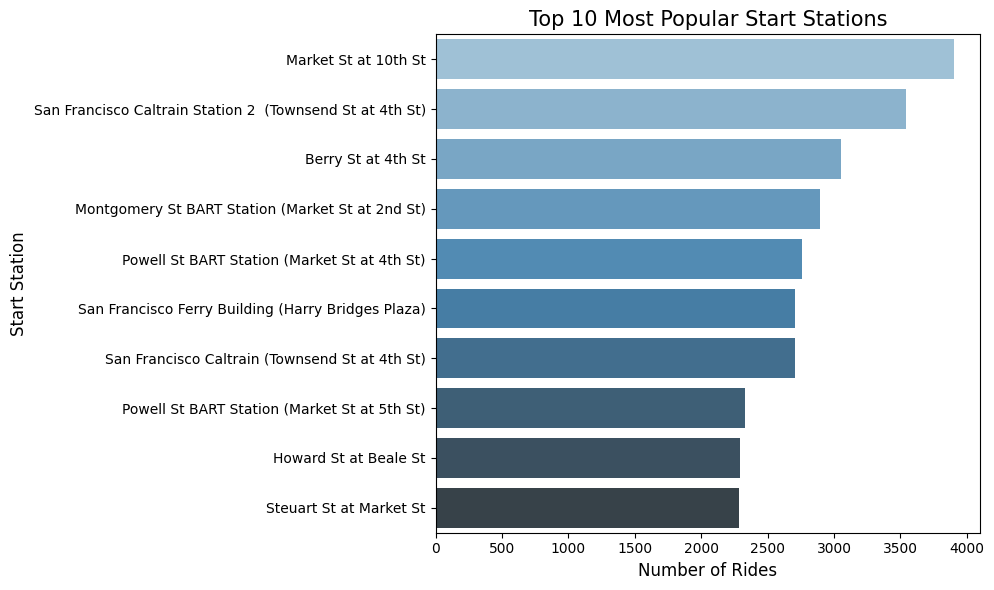

In [ ]:
# top 10 most popular start stations
plt.figure(figsize=(10, 6))
top_start_stations = fordgobike_clean['start_station_name'].value_counts().head(10)
sns.barplot(y=top_start_stations.index, x=top_start_stations.values, palette='Blues_d')
plt.title('Top 10 Most Popular Start Stations', fontsize=15)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Start Station', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Temporal Analysis by User Types: Rides by Hour for Subscribers vs. Customers

This visualization will show how rides are distributed by hour for both subscribers and customers. The goal is to understand the time preferences for different user types.

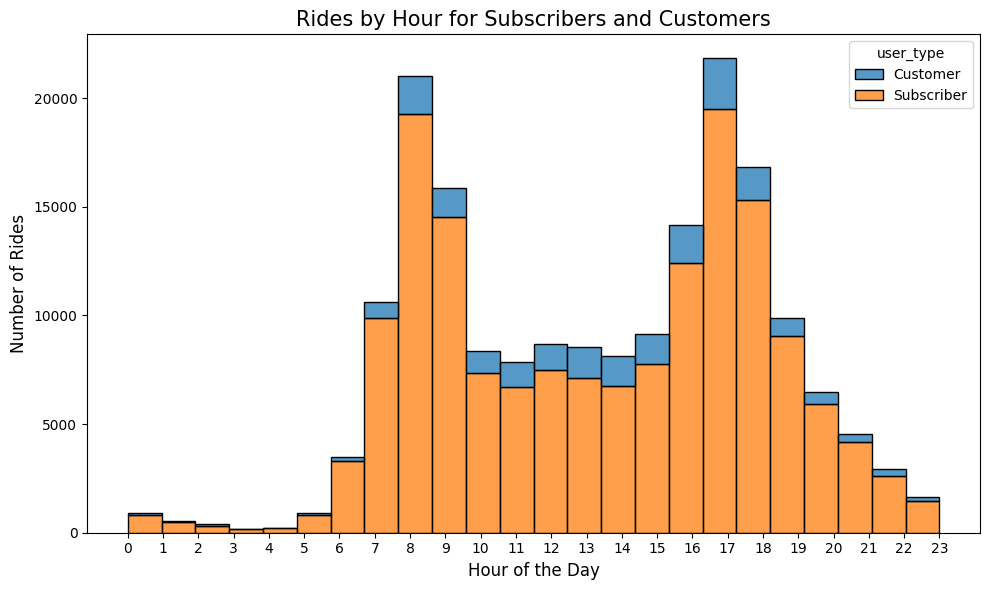

In [ ]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['start_hour'] = fordgobike_clean['start_time'].dt.hour

# Create the histogram plot using the extracted hour
plt.figure(figsize=(10, 6))
sns.histplot(data=fordgobike_clean, x='start_hour', hue='user_type', bins=24, kde=False, stat='count', multiple='stack')
plt.title('Rides by Hour for Subscribers and Customers', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(ticks=np.arange(0, 24, 1), labels=np.arange(0, 24, 1), fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



## Temporal Analysis: Rides by Day of the Week

This visualization examines bike usage across different days of the week, offering insight into weekly patterns of bike usage.

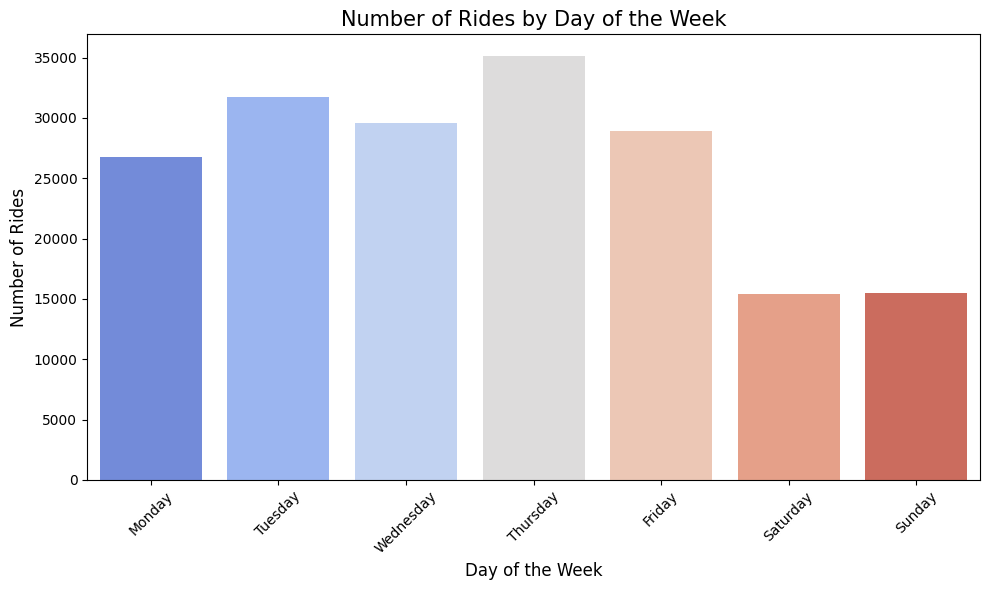

In [ ]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['day_of_week'] = fordgobike_clean['start_time'].dt.day_name()

# Create the count plot for rides by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=fordgobike_clean, x='day_of_week', palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
